<font size=4>

    
En cada ejercicio pueden agregar el número de celdas que requieran, por defecto se da solo una. 
    
 ___

<font size=4>
    
  Se descargó la base de datos *Superconductivty Data Data Set*.

    
[UCI Machine Learning Repository: Superconductivty Data Data Set ](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data)



Hay dos archivos: 

    (1) train.csv: contiene 81 características extraídas de 21263 superconductores junto con la temperatura crítica en la columna 82, 


    (2) unique_m.csv: contiene la fórmula química dividida para todos los 21263 superconductores del archivo  train.csv 



Las dos últimas columnas tienen la temperatura crítica y la fórmula química. Los datos originales provienen de [aquí](https://supercon.nims.go.jp/index_en.html) que es público. 

**El objetivo aquí es predecir la temperatura crítica en función de las características extraídas.**

<font size=4 color='rosybrown'>

    
# Parte 1: Análisis de datos

<font size=4 color='cornflowerblue'>

    
## Ejercicio 1

<font size=4>
    
 Importa las librerias que vas a usar:
    
  - pandas
  
  - matplotlib.pyplot
    
  - numpy

In [56]:
# ejercicio 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<font size=4 color='cornflowerblue'>
    
## Ejercicio 2

<font size=4>
    
1. Haz un dataframe con el archivo 'train.csv', usando la función read_csv() de pandas.
    
    
2. Visualiza el dataframe (puedes usar los atributos head() y tail()).
    
    
3. Usa el método describe() para obtener los datos estadísticos de todo el dataframe.

In [57]:
# ejercicio 2 - 1
ly = pd.read_csv('data/train.csv')

[read_csv( )](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [58]:
# ejercicio 2 - 2
ly

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [59]:
ly.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [60]:
# ejercicio 2 - 3
ly.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


<font size=4 color='cornflowerblue'>
    
## Ejercicio 3

<font size=4>
    
 Responde las siguientes preguntas:
    
¿Cuántas muestras tienes?,¿Qué define a cada muestra? 
    
    
¿Cuáles son los rasgos (variables independientes)?, ¿ a qué columnas corresponden?
    
    
¿Cuál(es) es la variable de salida (variable dependiente)?, ¿a qué columnas corresponden?
    
 Nota: el atributo shape te podría ser útil, además de la información que se da al inicio sobre el conjunto de datos.
    

<font size=4, color=turquoise>

Respuestas.    

<font size=4, color=black>

Se tienen 21263 muestras correspondientes al número de superconductores.

Las variables independientes son las 81 características recolectadas de los superconductores ubicadas desde la primer columna (columna 1 - number_of_elements) hasta la penultima (columna 81 - wtd_std_Valence).

Y la variable de salida (dependiente) es únicamente la correspondiente a la última columna (columna 82 - critical_temp).

<font size=4 color='cornflowerblue'>
    
## Ejercicio 4

<font size=4>
    
Grafica los histogramas para al menos 4 de las columnas del dataframe creado. 

Text(0.5, 0, 'entropy Valence')

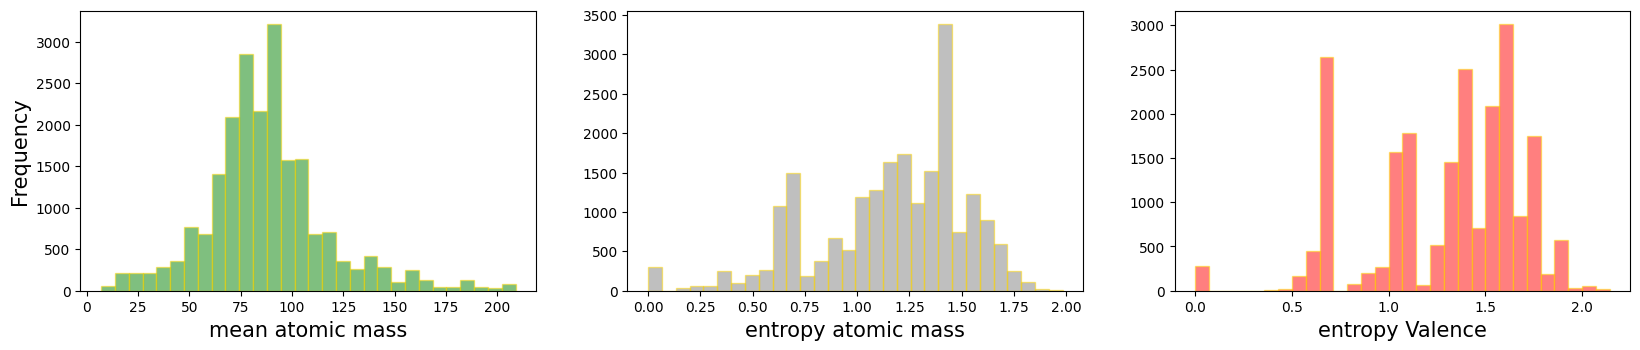

In [61]:
# ejercicio 4
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(ly.mean_atomic_mass, bins=30, color='green',edgecolor='gold', alpha=0.5)
ax1.set_xlabel('mean atomic mass', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(ly.entropy_atomic_mass, bins=30, color='grey',edgecolor='gold', alpha=0.5)
ax2.set_xlabel('entropy atomic mass', size=15)

ax3.hist(ly.entropy_Valence, bins=30, color='red',edgecolor='gold', alpha=0.5)
ax3.set_xlabel('entropy Valence', size=15)


Text(0.5, 0, 'std Valence')

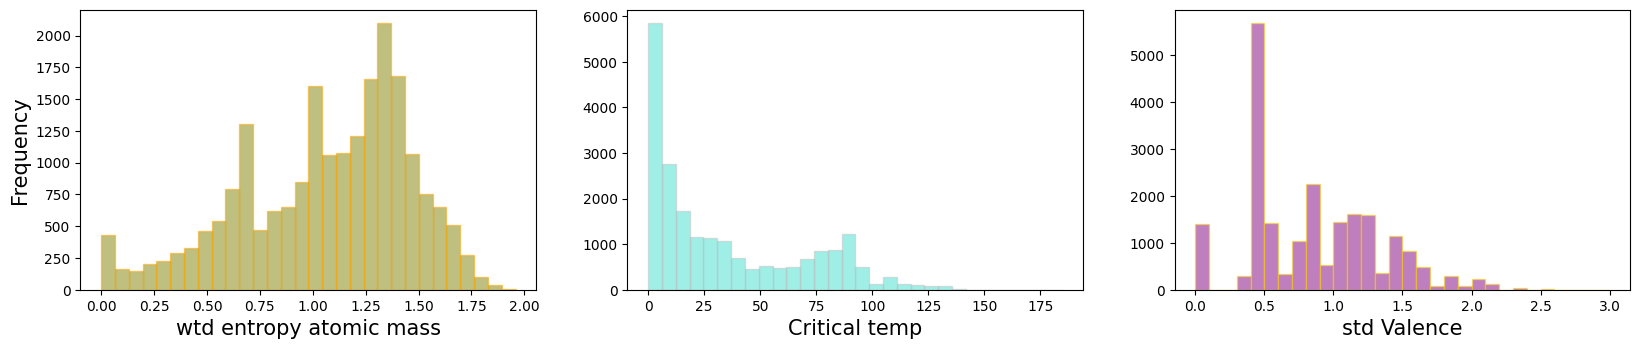

In [62]:
plt.figure(figsize=(20,8)) 

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(ly.wtd_entropy_atomic_mass, bins=30, color='olive',edgecolor='orange', alpha=0.5)
ax1.set_xlabel('wtd entropy atomic mass', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(ly.critical_temp, bins=30, color='turquoise',edgecolor='silver', alpha=0.5)
ax2.set_xlabel('Critical temp', size=15);

ax3.hist(ly.std_Valence, bins=30, color='purple',edgecolor='gold', alpha=0.5)
ax3.set_xlabel('std Valence', size=15)


<font size=4 color='cornflowerblue'>
    
## Ejercicio 5

<font size=4>
    
1. Intercambia el orden de los renglones del dataframe.
    
    
2. Divide en dos el dataframe, el primero que contenga el 90% de las muestras (nombralo df_train) y el otro que contenga el resto de las muestras (nombralo df_test).
    
    
3. Muestra en pantalla las dimensiones resultantes de cada dataframe.

In [63]:
ly.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [64]:
# ejercicio 5 - 1
ly = ly.sample(frac=1)

In [65]:
ly.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
14587,2,9.911591,10.331608,9.870699,10.299177,0.689024,0.542243,1.798818,5.528049,0.899409,...,2.733496,2.449490,2.692727,0.673012,0.493380,1,1.667482,0.500000,0.442131,0.720
17321,3,45.958100,49.740921,28.914187,32.092745,0.674269,0.554749,93.861500,39.003721,43.784610,...,1.684211,1.817121,1.582677,1.011404,0.811981,2,1.000000,0.816497,0.566859,1.025
5503,4,76.444563,50.426168,59.356672,34.708082,1.199541,1.293319,121.327600,13.267725,43.823354,...,2.071429,2.213364,2.058771,1.368922,1.192015,1,0.857143,0.433013,0.257539,80.000
9863,3,23.602467,23.225714,17.452353,18.892636,0.828445,0.835578,40.926000,11.901743,17.551625,...,2.385714,2.000000,2.164878,0.955700,0.890002,3,0.985714,1.247219,1.045984,9.600
9021,7,107.261364,67.163645,79.682454,39.622579,1.717599,1.714890,188.383900,17.920173,69.833635,...,2.086667,2.245649,2.071530,1.927392,1.506101,1,1.026667,0.451754,0.281346,75.300


In [66]:
# ejercicio 5 - 2
test_ratio = 0.1

train_ratio = int((1.0-test_ratio)*len(ly.values[:,:]))

df_train = ly.iloc[0:train_ratio,:]
df_test  = ly.iloc[train_ratio:,:]

In [67]:
# ejercicio 5 - 3
print(df_train.shape)
print(df_test.shape)

(19136, 82)
(2127, 82)


<font size=4 color='cornflowerblue'>
    
## Ejercicio 6

<font size=4>

Normaliza las muestras de los dataframe df_train y df_test usando los datos estadísticos del dataframe correspondiente a las muestras de entrenamiento. 

$$x_{norm} = \dfrac{x-\bar{x}}{\sigma}$$

In [68]:
# ejercicio 6
df_train_norm = (df_train - df_train.mean()) / df_train.std()
df_train_norm.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
14587,-1.468209,-2.618109,-1.869153,-1.981756,-1.315805,-1.305943,-1.300672,-2.083350,-1.025558,-2.171199,...,-0.351654,-0.580228,-0.308536,-1.583201,-1.472193,-0.838421,0.188762,-0.700900,-0.508887,-0.983775
17321,-0.774078,-1.403314,-0.694527,-1.367738,-0.722001,-1.346369,-1.269506,-0.397468,0.211521,-0.029956,...,-1.232634,-1.185022,-1.253921,-0.722685,-0.634030,-0.033604,-0.493719,-0.048348,-0.235385,-0.974870
5503,-0.079947,-0.375897,-0.674102,-0.386182,-0.650741,0.092739,0.571062,0.105500,-0.739541,-0.028022,...,-0.907526,-0.806057,-0.848451,0.186466,0.365745,-0.838421,-0.639786,-0.839014,-0.913655,1.331062
9863,-0.774078,-2.156716,-1.484834,-1.737301,-1.081661,-0.923968,-0.569661,-1.366840,-0.790021,-1.339760,...,-0.643652,-1.010118,-0.758084,-0.864339,-0.428779,0.771213,-0.508326,0.839714,0.815228,-0.724495
9021,2.002447,0.662653,-0.175228,0.269180,-0.516837,1.512082,1.621644,1.333457,-0.567612,1.270663,...,-0.894732,-0.775181,-0.837584,1.606627,1.192026,-0.838421,-0.466453,-0.800374,-0.861452,1.193831


In [69]:
#Promedio por cada columna
df_train.mean()

number_of_elements        4.115176
mean_atomic_mass         87.598528
wtd_mean_atomic_mass     73.042641
gmean_atomic_mass        71.333945
wtd_gmean_atomic_mass    58.591334
                           ...    
range_Valence             2.041754
wtd_range_Valence         1.482868
std_Valence               0.839946
wtd_std_Valence           0.674205
critical_temp            34.412948
Length: 82, dtype: float64

In [70]:
#Desviación standar por columna
df_train.std()

number_of_elements        1.440650
mean_atomic_mass         29.672918
wtd_mean_atomic_mass     33.550509
gmean_atomic_mass        31.014542
wtd_gmean_atomic_mass    36.701600
                           ...    
range_Valence             1.242519
wtd_range_Valence         0.978023
std_Valence               0.485014
wtd_std_Valence           0.456042
critical_temp            34.248620
Length: 82, dtype: float64

<font size=4>

Y como la normalización de las muestras de prueba se realiza con los valores de $\bar{x}$ y $\sigma$ obtenidos con las muestras empleadas para el entrenamiento, entonces

In [71]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()
df_test_norm.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
13014,-0.774078,0.443011,0.667872,0.942910,1.001587,-0.188249,-1.061732,-1.868825,1.295984,-1.930273,...,1.740214,1.794437,1.832532,-0.535055,-1.094623,-0.033604,2.266953,-0.048348,-0.499275,-0.932094
149,-0.079947,0.141866,-0.518774,-0.117514,-0.612096,0.021432,0.671984,0.344165,-0.776303,0.523890,...,-0.903455,-0.806057,-0.845000,0.186466,0.379878,-0.838421,-0.641123,-0.839014,-0.896327,1.725239
11097,-1.468209,-1.204460,-1.039225,-1.278159,-0.993068,-2.277821,-1.444655,-0.612933,-0.351750,-0.166610,...,0.431836,0.781194,0.427441,-1.612314,-0.957540,-0.033604,-1.175367,0.329999,0.588989,-0.875158
18254,-1.468209,0.637211,0.257820,0.155976,-0.040983,-2.033057,-1.219540,0.610101,0.209141,1.500729,...,2.111037,2.315482,2.206834,-1.542520,-1.176449,-0.838421,0.869576,-0.700900,-0.444696,-0.983936
16490,-1.468209,-1.287176,-0.677070,-0.707849,-0.225607,-1.295974,-1.439462,-2.059989,-0.077608,-2.139352,...,1.383384,1.354220,1.470613,-1.547727,-1.584838,-0.838421,1.755718,-0.700900,-0.601270,-0.796031


<font size=4 color='cornflowerblue'>
    
## Ejercicio 7

<font size=4>

1. Crea los arreglos train_x y train_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe train, respectivamente. 
    
    
2. Crea los arreglos test_x y test_y con los valores de las columnas correspondientes a las variables independientes y a las variables dependientes del dataframe test, respectivamente. 
    
    
3. Muestra en pantalla las dimensiones de cada arreglo.

In [72]:
# Ejercicio 7 - 1
x_train = df_train_norm.values[:,:-1]
y_train = df_train_norm.values[:,-1:]
print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(19136, 81)
(19136, 1)


In [73]:
train_x = x_train.T

train_y = y_train

In [74]:
# Ejercicio 7 - 2
x_test = df_test_norm.values[:,:-1]
y_test = df_test_norm.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2127, 81)
(2127, 1)


In [75]:
test_x = x_test.T

test_y =  y_test

In [76]:
# Ejercicio 7 - 3
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(81, 19136)
(19136, 1)
(81, 2127)
(2127, 1)
